# Práctica 1 Extracción del conocimiento en bases de datos

Se desea construir un sistema basado en Analítica de datos que
ayude en la tarea de concesión de los créditos.

## Tareas

1. `Preparar los datos`. 
Desarrollar las tareas de prepararación de los
datos necesarias para disponer de una base de datos apropiada
para la tarea de clasificación. Entre las labores a realizar se encuentran las de visualización y comprensión de las variables, cambio de tipos, transformación e identificación de outliers y datos
faltantes. También debe quedar claro si nos enfrentamos a una
clasificación con clases balanceadas o no.


Para comenzar con la práctica, primero se importan las librerías necesarias y se carga el dataset.

In [1]:
# Carga de las distintas librerías necesarias y el dataset del que se hace uso
import pandas as pd


# Carga del dataset
dataset = pd.read_csv('../data/Base de datos - homeLoanAproval.csv')

Una vez se tienen cargadas las distintas librerías de las cuales se va a hacer uso, y, el dataset, se procede a realizar los cambios de tipos, la transformación e identificación de outliers y datos faltantes.

In [2]:
# Una vez cargado el dataset, se procede a la visualización de los datos del dataset

# Se visualizan los primeros 5 registros del dataset
print(dataset.head())

# Se visualiza la cantidad de registros y columnas del dataset
print()
print('Número de registros y columnas del dataset: ', dataset.shape)

    Loan_ID Gender Married Dependents     Education SelfEmployed  \
0  LP001002   Male      No          0      Graduate           No   
1  LP001003   Male     Yes          1      Graduate           No   
2  LP001005   Male     Yes          0      Graduate          Yes   
3  LP001006   Male     Yes          0  Not Graduate           No   
4  LP001008   Male      No          0      Graduate           No   

   ApplicantIncome CoapplicantIncome  LoanAmount  LoanAmountTerm PropertyArea  \
0             5849                 0         NaN           360.0        Urban   
1             4583              1508       128.0           360.0        Rural   
2             3000                 0        66.0           360.0        Urban   
3             2583              2358       120.0           360.0        Urban   
4             6000                 0       141.0           360.0        Urban   

  LoanStatus  
0          Y  
1          N  
2          Y  
3          Y  
4          Y  

Número de reg

In [3]:
# Se identifican los tipos de datos de las columnas del dataset, además del significado de cada una de ellas
print()
print('Tipos de datos de las columnas del dataset: ')
print(dataset.dtypes)

# Se hace un resumen estadístico de las columnas numéricas del dataset
print()
print('Resumen estadístico de las columnas numéricas del dataset: ')
print(dataset.describe())



Tipos de datos de las columnas del dataset: 
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome     object
LoanAmount           float64
LoanAmountTerm       float64
PropertyArea          object
LoanStatus            object
dtype: object

Resumen estadístico de las columnas numéricas del dataset: 
       ApplicantIncome  LoanAmount  LoanAmountTerm
count       614.000000  592.000000       600.00000
mean       5403.459283  146.412162       342.00000
std        6109.041673   85.587325        65.12041
min         150.000000    9.000000        12.00000
25%        2877.500000  100.000000       360.00000
50%        3812.500000  128.000000       360.00000
75%        5795.000000  168.000000       360.00000
max       81000.000000  700.000000       480.00000


Teniendo en cuenta esto anterior, cabe destacar que el dataset se compone de 12 variables, de las cuales 11 son variables predictoras y 1 es la variable objetivo. Las variables predictoras son las siguientes:

- `Loan_ID`: Identificador de la solicitud.
- `Gender`: Género del solicitante.
- `Married`: Estado civil del solicitante.
- `Dependents`: Número de personas a cargo del solicitante.
- `Education`: Nivel de educación del solicitante.
- `Self_Employed`: Si el solicitante es autónomo o no.
- `ApplicantIncome`: Ingresos del solicitante.
- `CoapplicantIncome`: Ingresos del segundo solicitante del crédito.
- `LoanAmount`: Cantidad del préstamo.
- `LoanAmountTerm`: Plazo del préstamo (Medido en meses).
- `PropertyArea`: Zona de la propiedad que se quiere hipotecar.
- `LoanStatus`: Indica el estado de que se ha concedido o no el préstamo.

In [4]:
# Se identifican los valores nulos de cada columna del dataset
print()
print('Valores nulos de cada columna del dataset: ')
print(dataset.isnull().sum())


Valores nulos de cada columna del dataset: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
PropertyArea          0
LoanStatus            0
dtype: int64


Teniendo en cuenta los valores nulos que se encuentran en las distintas columnas anteriores, se procede a tomar decisiones o acciones dependiendo del tipo de variable que se trate. 

In [5]:
# Transformación de los datos nulos del dataset

# Imputación de los valores que posteriormente se transfomarán en categóricos a través de la moda
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['SelfEmployed'] = dataset['SelfEmployed'].fillna(dataset['SelfEmployed'].mode()[0])

# Imputación de los valores de la variable de Dependents a través de la moda
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])

# Imputación de los valores de la variable de LoanAmount a través de la mediana
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())

# Imputación de los valores de la variable de LoanAmountTerm a través de la moda
dataset['LoanAmountTerm'] = dataset['LoanAmountTerm'].fillna(dataset['LoanAmountTerm'].mode()[0])

In [6]:
# Cambios de tipos de datos de las columnas del dataset para su correcto manejo

# Conversión de columnas a tipo categórico, ya que este tipo para pandas es más eficiente que el tipo object, ya que se tratan de aquellas variables que pueden tomar un número limitado de valores distintos 
# Reemplazar valores no válidos en la columna 'Dependents'
dataset['Dependents'] = dataset['Dependents'].replace('3+', 3)

# Conversión de Dependents a tipo entero (int64)
dataset['Dependents'] = dataset['Dependents'].astype('int64')

# Conversión de columnas a tipo categórico
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Married'] = dataset['Married'].astype('category')
dataset['Education'] = dataset['Education'].astype('category')
dataset['SelfEmployed'] = dataset['SelfEmployed'].astype('category')
dataset['PropertyArea'] = dataset['PropertyArea'].astype('category')
dataset['LoanStatus'] = dataset['LoanStatus'].astype('category')

# # Conversión de CoapplicantIncome a tipo numérico (float64)
dataset['CoapplicantIncome'] = dataset['CoapplicantIncome'].str.replace('.', '', regex=False)
dataset['CoapplicantIncome'] = pd.to_numeric(dataset['CoapplicantIncome'], errors='coerce')

# Conversión de LoanAmountTerm a tipo entero
dataset['LoanAmountTerm'] = dataset['LoanAmountTerm'].astype('int64')

## Análisis de los datos

b) Analizar los datos. Construir un clasificador k-NN, un árbol de
clasificación y un clasificador naive Bayes. Se propone considerar
varios escenarios. En el primero, independientemente de que existan o no datos faltantes o outliers, se aplicará el correspondiente
algoritmo de inducción sin tener en cuenta estos hechos. En el segundo escenario, se aplicarán técnicas para tratar con los outliers
y los datos faltantes y se construirán los anteriores clasificadores.
Debe evaluarse también el uso de técnicas para tratar con clases desbalanceadas y el efecto que tienen estas técnicas en la calidad de los clasificadores obtenidos


### Clasificador k-NN

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Convertir columnas categóricas a variables dummy (para que sean tratadas como variables numéricas)
X = pd.get_dummies(dataset.drop('LoanStatus', axis=1))
y = dataset['LoanStatus']

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el clasificador
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6 37]
 [ 9 71]]
              precision    recall  f1-score   support

           N       0.40      0.14      0.21        43
           Y       0.66      0.89      0.76        80

    accuracy                           0.63       123
   macro avg       0.53      0.51      0.48       123
weighted avg       0.57      0.63      0.56       123



### Clasificador Árbol de clasificación

[[ 0 43]
 [ 3 77]]
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        43
           Y       0.64      0.96      0.77        80

    accuracy                           0.63       123
   macro avg       0.32      0.48      0.39       123
weighted avg       0.42      0.63      0.50       123



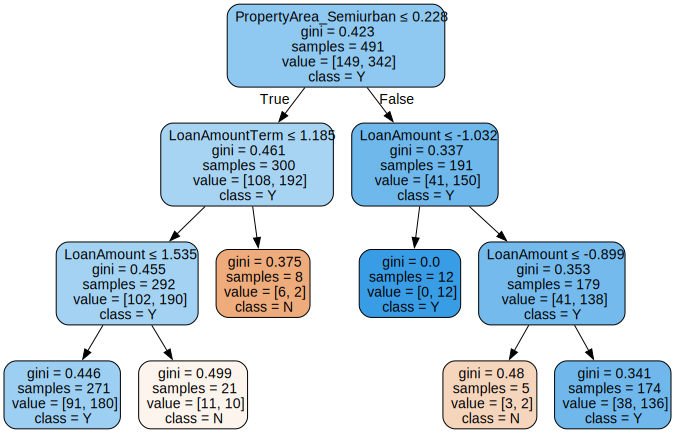

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import graphviz

# Crear el clasificador de árbol de decisión con hiperparámetros ajustados
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=5)

# Entrenar el clasificador
tree_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_clf.predict(X_test)

# Evaluar el clasificador
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Exportar el árbol de decisión a un archivo DOT
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=tree_clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  

# Visualizar el árbol de decisión
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Esto guardará el árbol como un archivo PDF llamado "decision_tree.pdf"
graph

### Clasificador Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Crear el clasificador Naive Bayes
nb_clf = GaussianNB()

# Entrenar el clasificador
nb_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_nb = nb_clf.predict(X_test)

# Evaluar el clasificador
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, zero_division=1))

[[43  0]
 [80  0]]
              precision    recall  f1-score   support

           N       0.35      1.00      0.52        43
           Y       1.00      0.00      0.00        80

    accuracy                           0.35       123
   macro avg       0.67      0.50      0.26       123
weighted avg       0.77      0.35      0.18       123

